In [1]:
%%html
<center>Photo Credit: <a href="https://pixabay.com/illustrations/police-crime-scene-blue-light-2167968/">pixabay</a><BR><img src="img/police-2167968_1280.jpg" align="center"></center>

<h1><strong><center>CMSC320 Final Project<BR>Predicting the Crime 'Theft From Auto' in Washington, DC<center></strong></h1>
    <center><i>Group members: Leo Wu, Kevin Nguyen, Cindy Huynh<BR>Spring 2020 - Hector Corada Bravo</i></center>

# Introduction

Crime culture is different in different areas. 
In the past, Chicago and Los Angeles have been known for gangs (ChicagoMag, 2012).
Currently, Baltimore, Maryland, is considered the deadliest US city with 348 killings by the end of 2019, which is not the final value yet (Kennedy, 2020).
Therefore, due to the proximity of Washington, DC to the University of Maryland, we wanted to examine crime in Washington, DC.
According to the Patch, DC was ranked America's 16th most dangerous city in 2017 (2018).

At DC Atlas, we noticed that Theft From Auto appeared to be significant, in regards to Property Crime (2020). 
According to City of Cincinnati, Ohio, "Theft from Auto" is a crime of opportunity and is preventable (2020).

# Hypothesis 
The question we are interested in is, while analyzing the trends of crime in DC, and can we predict 'Theft from Auto' crime in DC with data for ten years of data 2010-2019?

# Purpose
Our overall goal is to predict what will happen in 2020 in terms of Theft from Auto (TFA) crimes. Therefore, we will train our ML models on the data from 2010-2019 to test or predict the data in 2020.


In [4]:
#Importing required libraries
from ipyleaflet import *
import warnings
import pandas as pd
import sklearn.ensemble
from sklearn import neighbors
from sklearn.model_selection import KFold
import sklearn.metrics
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from plotnine import *

theme_set(theme_minimal())
warnings.filterwarnings('ignore')


# Dataset
    
<span style="font-family: Arial"><strong>Why we chose our dataset:</strong> Since Theft from Auto (TFA) is a significant portion of crime from 2010-2019, and theft (other) is a very broad category, we chose to focus on this crime. Our preliminary analysis of the data is that TFA consists of the second highest (29.5% or 93181 out of total of 315867)  of all crime listed in this dataset. Note that this dataset does not include drug crime, so we cannot make any assumptions about this. <BR><BR>
<strong>Size of the dataset:</strong> When looking at your dataset, the columns indicate attributes, and the rows indicate entities or observations.
In our dataset of 2010-2019, we have 25 attributes, 349342 rows of data. We chose to focus on the X (longitude), Y (latitude), Report Date, Start Date, End Date, and Offense. Our X and Y values are of type double. The date values are converted to datetime objects. The Offense attribute was kept as a string or character object type.

# Data Curation
The data was obtained from Open Data DC site at https://opendata.dc.gov/datasets/crime-incidents-in-2010 through https://opendata.dc.gov/datasets/crime-incidents-in-2019. 
Spreadsheets were downloaded from the site and combined into one spreadsheet for ten years of data from 2010 to 2019.
Approximately 33,000 to 38,000 entities/observations were obtained from each year, totalling approximately 350,000 observation in total (349,343 to be exact).<BR><BR>
In data science, when we want to extract desired data from a website, we usually get more than what we needed. We may get useless data or garabage data that we won't need. To get around this, we tidy our data to make a cleaner dataset for us to work with. There are a few ways to tidy our data: Gathering (eliminate the column headers with values and replace with variable name), splitting (separate the multiple variables stored in one column), rotating (when there are variables storied both in rows and column), normalizing (separating multiple types of obersavtional units that are stored in the same table into multiple different tables), and joining (combining multiple datasets based on a condition into one dataset).<BR><BR>
In our tutorial, we tidy our trained data (2010-2019) by dropping any unnecessary columns of data, leaving only the latitude as X, longitude as Y (the coordinates to where the crime was reported), report date (date the police officer recorded the report), start date (the date the crime started), end date (date the crime supposedly ended), and offense (theft from auto). We then dropped any entities/observations with missing data in any fields. We converted any date/time fields to datetime objects in python. Examples and usage can be found at <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html">https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html</a> and <a href="https://colab.research.google.com/github/gal-a/blog/blob/master/docs/notebooks/pandas/pandas_datetime.ipynb">https://colab.research.google.com/github/gal-a/blog/blob/master/docs/notebooks/pandas/pandas_datetime.ipynb</a>.
 
<BR><strong>Further tidying:</strong> Since we identified that we still have some unrelated data, we could either remove it from our dataset, or filter it out to ignore it. We chose to filter it out later on ie. during out Prediction task to generate a table for totals for each year, and use that as our training data for Machine Learning. Since report dates would report crime that did not necessarily start in the same year it was reported, we can filter out the data many different ways. <i>It is important to document the method that was used so that <strong>reproducibility</strong> can occur.</i> Since we know that very few reported crimes did not start the same year it was reported, we ignore entities/observations that do not match a start date between years 2010-2019, by filtering for year 2010 start date.<BR><BR>

Our df1 represents the whole crime dataset. We tidy df1 to utilize a cleaner dataset without any of the useless information. <BR>
# Exploratory Data Analysis (EDA)
In EDA, our goal is to perform an initial exploration of our data.
<BR>We use visualizations of the data in tables and box plots to see the relation between attributes/variables across our entities/observations.
<BR>Our first step is to show the frequency of each type of crime has occured from 2010 to 2019.

In [5]:
#read the CSV file. df1 is full dataset dataframe
df1 = pd.read_csv("./Crime_Incidents_in_2010_to_2019.csv")

#all_offense_df is filtered dataset. filter for all offenses, drop unnecessary columns, drop rows w any fields containing NA
all_offense_df = (df1.drop(columns = ['BID','LONGITUDE','LATITUDE','VOTING_PRECINCT', 'OBJECTID',
                        'OCTO_RECORD_ID','CCN','SHIFT','BLOCK','XBLOCK','YBLOCK','WARD',
                        'ANC','DISTRICT','PSA','METHOD','NEIGHBORHOOD_CLUSTER','BLOCK_GROUP',
                        'CENSUS_TRACT'])
        .dropna())
#Here displays the frequency of each type of offenses that occured between 2010-2019
all_offense_df['OFFENSE'].value_counts()

THEFT/OTHER                   131973
THEFT F/AUTO                  104680
ROBBERY                        31758
MOTOR VEHICLE THEFT            28239
BURGLARY                       26965
ASSAULT W/DANGEROUS WEAPON     21552
SEX ABUSE                       2674
HOMICIDE                        1272
ARSON                            229
Name: OFFENSE, dtype: int64

From our observation, theft (other) is the most frequent type of offense to occur while auto theft (THEFT F/AUTO) being the second highest.<BR>

Now we focus on anaylzing Theft F/Auto. In order to do that we have to create a new dataframe with the only type of offenses is Auto Theft. <BR>
In df1 dataset, we filtered out only THEFT F/AUTO occurences. This is a sizeable amount of data from our dataset.<BR>
In df2 dataset, we sampled 1000 observations from the entire dataset to plot on a map. This includes observations other than THEFT F/AUTO.<BR>
In tmp dataset, we filter out crime start years 2010-2019 to use as our training data for the Prediction Task / Machine Learning (ML) models.

In [11]:
#df is filtered dataset. filter for TFA offenses, drop unnecessary columns, drop rows w any fields containing NA
df = (df1.query('OFFENSE == "THEFT F/AUTO"')
        .drop(columns = ['BID','LONGITUDE','LATITUDE','VOTING_PRECINCT', 'OBJECTID',
                        'OCTO_RECORD_ID','CCN','SHIFT','BLOCK','XBLOCK','YBLOCK','WARD',
                        'ANC','DISTRICT','PSA','METHOD','NEIGHBORHOOD_CLUSTER','BLOCK_GROUP',
                        'CENSUS_TRACT'])
        .dropna())

#converting date/time text to datetime objects for df and df1
df1['START_DATE'] = pd.to_datetime(df1.START_DATE, format="%Y-%m", errors='coerce')
df1['END_DATE'] = pd.to_datetime(df1.END_DATE, format="%Y-%m", errors='coerce')
df1['REPORT_DAT'] = pd.to_datetime(df1.REPORT_DAT, format="%Y-%m", errors='coerce')
df1.dropna()
df['START_DATE'] = pd.to_datetime(df.START_DATE, format="%Y-%m")
df['END_DATE'] = pd.to_datetime(df.END_DATE, format="%Y-%m")
df['REPORT_DAT'] = pd.to_datetime(df.REPORT_DAT, format="%Y-%m")
df #entire dataset for prediction task

#sample size of 1000 for mapping, labels will use 'strings' for datetimes
df2 = df.sample(n=1000) 

#display the filtered dataframe, note all offenses are THEFT F/AUTO
df.head()

,X,Y,REPORT_DAT,START_DATE,END_DATE,OFFENSE
5,-77.070211,38.913641,1915-10-17 21:00:57+00:00,2015-10-18 06:00:03+00:00,2015-10-24 16:53:07+00:00,THEFT F/AUTO
15,-77.020728,38.931145,2010-01-01 00:01:00+00:00,2009-12-31 22:30:00+00:00,2010-01-01 00:00:00+00:00,THEFT F/AUTO
17,-77.079550,38.943975,2010-01-01 01:15:00+00:00,2010-01-01 15:00:00+00:00,2010-01-01 23:55:00+00:00,THEFT F/AUTO
30,-77.036461,38.934970,2010-01-01 06:25:00+00:00,2009-12-31 23:00:00+00:00,2010-01-01 05:30:00+00:00,THEFT F/AUTO
34,-77.081195,38.930290,2010-01-01 07:45:00+00:00,2009-12-31 21:00:00+00:00,2010-01-01 07:00:00+00:00,THEFT F/AUTO


# VISUALIZATION: Map
<strong>Map Title:</strong> Theft From Auto Crime from 2010-2019 in DC<BR>
<strong>Description:</strong> The data can be plotted on to a map, especially if it has geographical coordinates, longitude and latitude. This map shows each theft from automobile crime that was taken in the sample from the dataframe. This is the geographical map with data points for a sample size of 1000 from data containing observations for theft from auto crimes from 2010-2019. The the sample dataset was used to plot the points in the map below using the python map module. See <a href="https://docs.python.org/3/library/functions.html#map">https://docs.python.org/3/library/functions.html#map</a> for more information. 

In [5]:
m = Map(center = (38.8951, -77.0364), zoom = 11)
for i in df2.iterrows():
    data = i[1]
    circle = Circle()
    circle.location = (data[1], data[0])
    circle.radius = 1
    circle.color = "green"
    circle.fill_color = "green"
    
    m.add_layer(circle)
m

Map(center=[38.8951, -77.0364], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

We can make an observation that the likelyhood of auto theft crime will occur would be near the center of DC. The data points shown are denser towards the center of Washington which implies that the frequency of auto theft occuring is higher there.

## Prediction task (Machine Learning)

In Machine Learning (ML) we use classifiers to help train our data to make predictions. A classifier is a hypothesis used to categorize and assign labels to particular data points. An example of a classifier would be: determining if someone would go out to play tennis on a sunny day based on a dataset that shows if that person went out to play tennis that day and the type of weather that occurs during the same day played. For arrests, we could use classifiers/attributes such as income or poverty levels to see if it is a predictor of crime level, but would involve multiple datasets for the same geographical region and time period. <BR><BR>For our tutorial, our classifier would be determining if more people would commit auto theft crime in DC in the future based on a dataset for the previous ten years that tells us the number of auto theft crimes reported, when they are reported, and where the crime that was reported happened.

> Can we predict the number of theft from automobiles in 2020?

Using our train dataset, we will first create a new dataframe that will consist of the years (2010-2019) and the number of theft autos that occur during those years.

In [18]:
#We create another dataframe that shows how much TFA occurred each year
tmp = pd.DataFrame(columns = ['# of Theft From Auto', 'Total Crime'], 
                   index = ['2010', '2011','2012','2013','2014',
                            '2015','2016','2017','2018','2019'])
# any NA values will be marked as 0 instead
tmp = tmp.fillna(0)

#iterate through all rows to see if the year matches
for i in df.iterrows():
    datetime = i[1][3].to_pydatetime() #uses matching start date year
    for j in tmp.iterrows():
        if str(datetime.year) == j[0]:
            tmp['# of Theft From Auto'][j[0]] += 1
for i in df1.iterrows():
    datetime = i[1][3].to_pydatetime() #uses matching start date year
    for j in tmp.iterrows():
        if str(datetime.year) == j[0]:
            tmp['Total Crime'][j[0]] += 1
tmp['TFA %'] = np.where(tmp['Total Crime'] < 1, 0, 100*tmp['# of Theft From Auto']/tmp['Total Crime'])

tmp

,# of Theft From Auto,Total Crime,TFA %
2010,8144,31653,25.728999
2011,9402,33199,28.320130
2012,9722,35126,27.677504
2013,10151,35839,28.323893
2014,11269,38177,29.517772
2015,11251,37066,30.353963
2016,12121,37151,32.626309
2017,10208,33014,30.920216
2018,11624,33811,34.379344
2019,10670,33693,31.668299


<strong>Title:</strong> Table for Statistics for Theft From Auto and Total DC Crime (2010-2019)<BR>
    <strong>Description:</strong> The chart table above is useful for seeing exact values and statistics at a glance about our data. Each attribute provides a useful piece of information about each year.
<BR>There are other ways to do this, such as built-in functions such as summary() table data. <BR><BR>
The tmp dataset is what we will use to train our ML model on. 
    <BR>ML models can include a variety of models, such as linear regression, logistic regression, K Nearest Neighbor (KNN), k-Fold Cross Validation, Decision Tree, and Random Forests.

# VISUALIZATION: Bar Plot

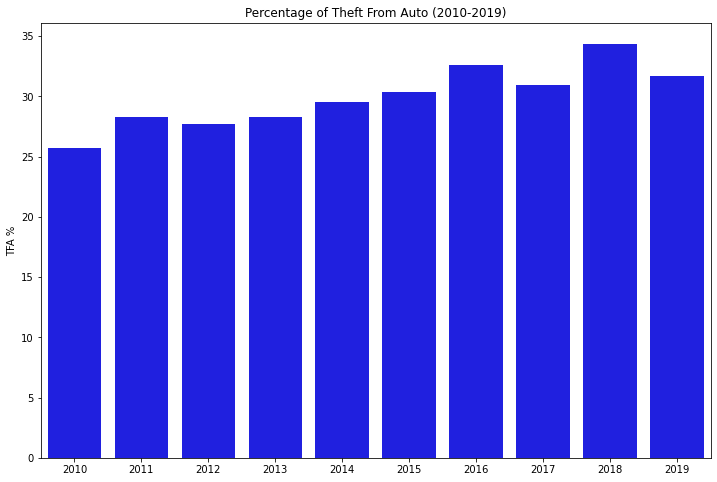

In [23]:
plot = sns.barplot(x = tmp.index, y = tmp['TFA %'], color = 'blue')
plot.set_title("Percentage of Theft From Auto (2010-2019)")
plot.set_position([plot.get_position().x0, 
                   plot.get_position().y0, 
                   plot.get_position().width*2, 
                   plot.get_position().height*2])
plot

<strong>Title:</strong> Barplot of Percentage of Theft From Auto (2010-2019)<BR>
<strong>X-Axis:</strong> Year<BR>
<strong>Y-Axis:</strong> TFA Percentage<BR>
<strong>Description:</strong> (Above) A bar plot can be used to visualize and present the data. Using the undistorted quantities of position and length allow for effective visualization of data.<BR><BR><BR>

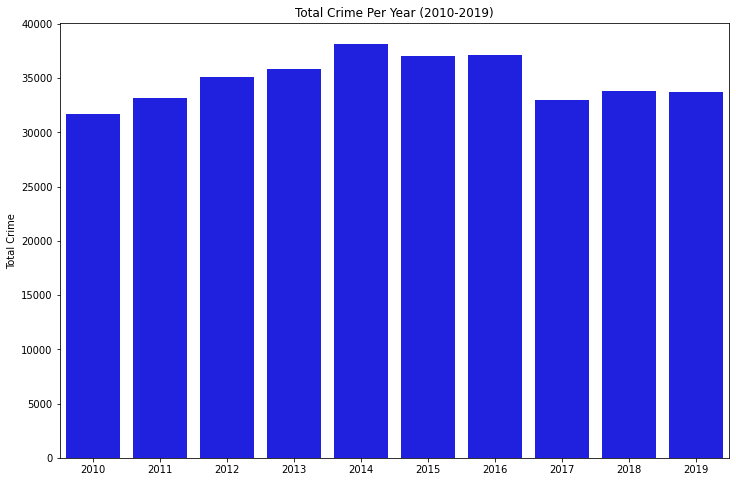

In [22]:
plot = sns.barplot(x = tmp.index, y = tmp['Total Crime'], color = 'blue')
plot.set_title("Total Crime Per Year (2010-2019)")
plot.set_position([plot.get_position().x0, 
                   plot.get_position().y0, 
                   plot.get_position().width*2, 
                   plot.get_position().height*2])
plot

<strong>Title:</strong> Barplot of Total Crime Per Year (2010-2019)<BR>
<strong>X-Axis:</strong> Year<BR>
<strong>Y-Axis:</strong> Total Crime<BR>
<strong>Description:</strong> (Above) This bar plot alternatively can be used to show other aspects of the data in a easy to interpret form. One idea that can be used is whether or not crime should be exhibited in a standardized format. For example, using the percent of TFA per year may be a way to standardize the data, since not every year will have the same amount of crime. This bar graph clearly shows there is a peak in crime in 2014.<BR><BR>The barplot above indicates the frequency of theft from cars from the years 2010-2019.<BR>
Based on our observations, the barplot shows some kind of positive relationship between time and the number of thefts from auto. As the years go by, the number of auto theft tends to increase. <BR><BR><BR>

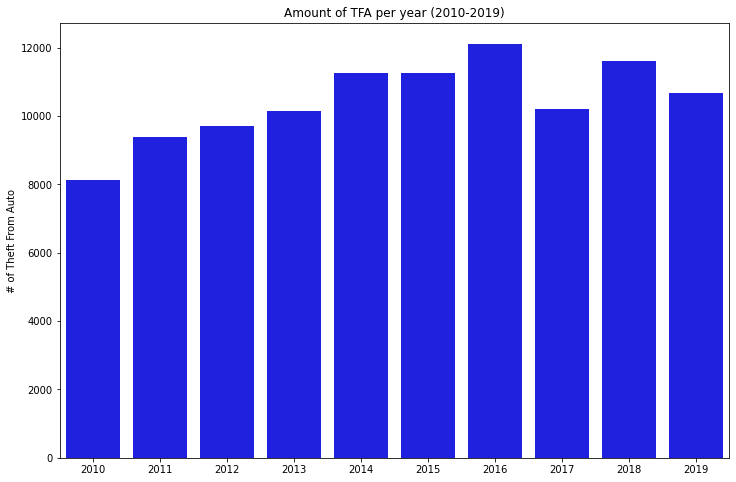

In [24]:
plot = sns.barplot(x = tmp.index, y = tmp['# of Theft From Auto'], color = 'blue')
plot.set_title("Amount of TFA per year (2010-2019)")
plot.set_position([plot.get_position().x0, 
                   plot.get_position().y0, 
                   plot.get_position().width*2, 
                   plot.get_position().height*2])
plot

<strong>Title:</strong> Barplot of Amount of TFA per year (2010-2019)<BR>
<strong>X-Axis:</strong> Year<BR>
<strong>Y-Axis:</strong> Amount of TFA<BR>
<strong>Description:</strong> (Above) This bar plot instead shows the number of TFA per year, instead of the percentage of TFA. Interpretations can easily be drawn from visuals such as bar graphs, scatterplots, histograms, violin plots, boxplots, and more. From this bar graph, we can see that the number of theft from auto is not always increasing each year. This may make it more difficult to predict. Also, keep in mind that police departments, are also aware of increasing trends, and may be proactive in running awareness campaigns to curb TFA. This could account for some of the decreases in TFA as seen in 2017 and 2019.

# Models of Machine Learning

# VISUALIZATION: Linear Regression

For our exploratory data analysis, we will use a linear regression model for our hypothesis testing. The linear regression model is a very common technique used to make predictions based on a conditional relationship between two variables. When dealing with visual graphs relating to economics, you usually see this “line of best fit” that tells us the relationship between X and Y-variables. In data science, we call this “line of regression” or the “linear fit” as we regress X-variable on Y-variable. We will use a linear regression model to determine and predict the relationship between years from the crime dataset and the number of auto theft cases reported in those years. <BR><BR>
A linear regression line model can be applied to the data for total crime. It appears that total crime has an overall increasing trend over the 2010-2019 time period.

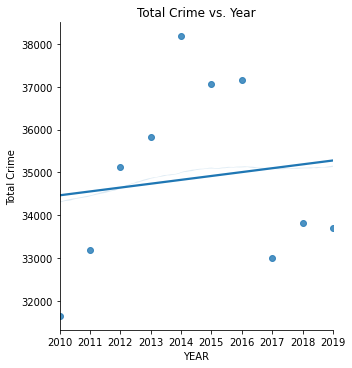

In [25]:
tmp1 = tmp.copy()
tmp1['YEAR'] = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
plot = sns.lmplot(x = 'YEAR', y = 'Total Crime', data = tmp1, ci=True)
axes = plot.axes.flatten()
axes[0].set_title("Total Crime vs. Year")
plot

<strong>Title:</strong> Total Crime vs Year<BR>
<strong>Description:</strong> Scatterplot of Total Crime over the years 2010-2019 with a linear regression line. As you can see there is a positive increasing linear trend.


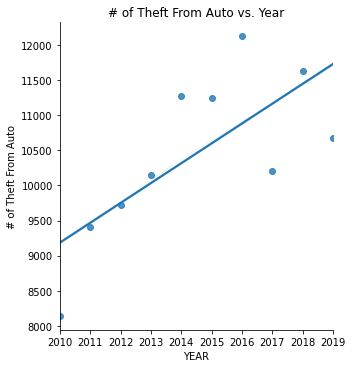

In [26]:
tmp2 = tmp1.copy()
plot2 = sns.lmplot(x = 'YEAR', y = '# of Theft From Auto', data = tmp2, ci=True)
axes = plot2.axes.flatten()
axes[0].set_title("# of Theft From Auto vs. Year")
plot2

<strong>Title:</strong> # of Theft From Auto vs Year<BR>
<strong>Description:</strong> Scatterplot of number of auto theft over the years 2010-2019 with a linear regression line. As you can see there is a positive increasing linear trend.


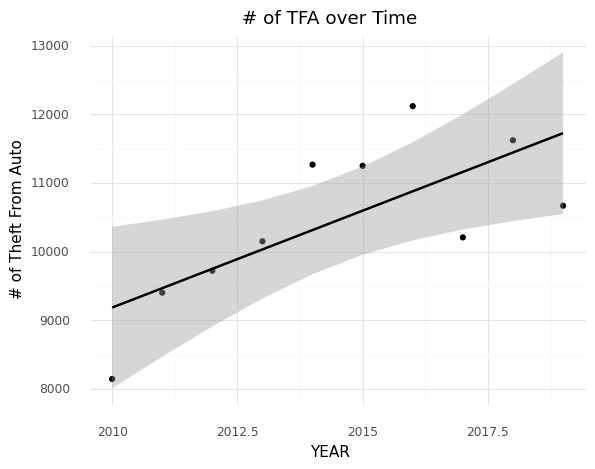

<ggplot: (300549321)>

In [34]:
(ggplot(tmp1, aes(x="YEAR", y="# of Theft From Auto")) +
 geom_point() +
 geom_smooth(method='lm')+
 theme_minimal() +
 ggtitle("# of TFA over Time")
)

<strong>Title:</strong> # of Theft From Auto vs Year<BR>
<strong>Description:</strong> Scatterplot of number of auto theft over the years 2010-2019 with a linear regression line. The gray shading is the 95% confidence level interval for predictions from our linear model. It is usually 95% by default. As you can see there is a positive increasing linear trend.

(Below) Now we are going to add a new column "YEAR" to our dataset to organize and group each auto theft case into their own year based on their report date (REPORT_DAT).

In [28]:
# Add new column separating year from datetime object
df['YEAR'] = df['REPORT_DAT'].apply(lambda x: x.to_pydatetime().year)

# VISUALIZATION: k-fold Cross-Validation

In this section, we will perform a 10-fold cross-validation. K-fold cross-validation is used to check how accurate our machine learning model will be on predictions. It partitions our dataset into k folds or groups, which in this tutorial we will making 10 folds. Out of the k folds, one of them will be assigned as the test data, while the rest of the groups (k-1) are assigned as training data. For the k-1 groups, we model our training data to our test data to measure performance on the prediction. The process is then repeated for every group in k-1 folds.<BR>According to our k-fold Cross Validation results, there is high error and therefore we cannot predict the data as the resulting p-value is much greater than p-value of 0.05. It is possible that k-fold Cross validation is not a good model to use for the prediction of the amount of TFA in DC.


In [29]:
X = df1.iloc[:,1:2].to_numpy()
y = df1.iloc[:,6:7].to_numpy()
kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(X)
print(kf)  

KFold(n_splits=10, random_state=None, shuffle=True)


In [30]:
k = 1
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = neighbors.KNeighborsClassifier(k, weights='uniform')
    clf.fit(X_train, y_train)
    k = k + 1
    Z = clf.predict(X_test)
    y_test = np.ravel(y_test)
    print(str(k-1) + " neighbors: " + str(sklearn.metrics.zero_one_loss(y_test,Z)))

1 neighbors: 0.6157435236868469
2 neighbors: 0.5900100186059825
3 neighbors: 0.5984714032174958
4 neighbors: 0.5902272857388218
5 neighbors: 0.5793782561401499
6 neighbors: 0.5828991813133337
7 neighbors: 0.5795786339955344
8 neighbors: 0.5812102822465219
9 neighbors: 0.584387702524761
10 neighbors: 0.5769737218755367


### Random Forest Model

Random forest models are excellent at predicting performance and reducing instability by averaging multiple decision trees (also known as Classification tree). This means using a random forest model will provide us a more accurate prediction table. As we know decision trees produce an outcome that is categorical. It predicts where training data will fall into by spliting partitions based on a single attribute. With a random forest model, we can make an average and predict which data point would fall into which category. We did not use the random forest model because we are not predicting a categorical outcome, such as a coin flip result, or the probability of a person defaulting on their credit.

# Conclusion

If the maximum amount of cars gets reached in DC, the model of best fit may appear sinusoidal in that case because the police department would try to bring down the levels of TFA every once in awhile and run a campaign to alert citizens to better practices, such as stowing away valuables from sight.
### Measures of Uncertainty
Measures of uncertainty can include usage of Bayes's Rule (used often with probability), statistical statements, such as "holding everything else constant, there is a 0.1 increase in GPA for every 10 additional hours a week of studying", usage of variance and standard deviation, and usage of standard error. As you can see with the increasing trend of overall crime in DC as well as an increasing trend of TFA in DC, we can make general statements such as the trend of TFA in DC appears to be increasing over time given the data for 2010-2019. <BR><BR>
Like with linear regression, confidence intervals can be constructed, and ideas from Central Limit Theorem such as standard deviation and spread can give us a sense of the uncertainty around our estimate. So, if we want to look at standard error, we can use the broom::tidy() in R or summary() in python table.<BR>
For each parameter, there is a standard error shown in the summary() table.<BR>
Even if one model is better than another, it still may not be able to reject the null hypothesis.<BR>
    For our example, we decided to test the hypothesis using the linear regression model. We obtained a confidence interval which shows how well we have determined the mean. Given the confidence interval, we would say, “on average, TFA increases <sub>+0.185734</sub> +0.1905 <sub>+0.195231</sub> per year.”


In [31]:
estimate = sm.OLS(tmp1["YEAR"], tmp1["# of Theft From Auto"]).fit()
X2 = sm.add_constant(tmp1["YEAR"])
estimate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   YEAR   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              794.7
Date:                Mon, 18 May 2020   Prob (F-statistic):                    4.33e-10
Time:                        23:28:09   Log-Likelihood:                         -67.811
No. Observations:                  10   AIC:                                      137.6
Df Residuals:                       9   BIC:                                      137.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
# of Theft From Auto     0.1905      0.007     28.190      0.000       0.175       0.206
==============================================================================
Omnibus:                        0.784   Durbin-Watson:                   0.832
Prob(Omnibus):                  0.676   Jarque-Bera (JB):                0.447
Skew:                           0.465   Prob(JB):                        0.800
Kurtosis:                       2.543   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
estimate.conf_int(alpha=0.5, cols = None)

,0,1
# of Theft From Auto,0.185734,0.195231


Here the "0" column stands for lower confidence interval and the "1" column stands for hgiher confidence interval.

### Hypothesis Testing
 Experiments need a way to test if the result is significant or not. The p-value is a measure of statistical significance, but it is not always accurate. In experiments, it is important not to go back and manipulate the data once we know the results of the experiment, which could be considered p-hacking, which is when a researcher attempts to obtain a p-value result that is significant before submitting their results/research.<BR>
       Our linear regression model prediction of the amount of TFA appears to be statistically significant since the p-value of 0.000 is less than 0.05. 
<BR>This makes sense because we have more and more people traveling into DC and working there. This also makes sense because crime overall appears to be increasing. One way to modify the experiment might be to standardize the crime to the amount of people in the population, commuters, and total crime.<BR><BR>
 Earlier, we stated the hypothesis we wanted to test, of which the null hypothesis would be: We cannot predict TFA in 2020.<BR>
The hypothesis we want to test is 'Can we predict TFA in 2020' based on the DC crime data 2010-2019.
The p-value we will use to compare if our results are significant is 0.05. The p-value in the summary() table indicates that the model fit is not significant enough.<BR>
Since our p-value is greater than 0.05, our results are not significant, and therefore we cannot reject the null hypothesis. We must accept the null hypothesis that we cannot predict TFA in 2020.
   <BR>According to our k-fold Cross Validation results, there is high error and therefore we cannot predict the data as our p value is much greater than p-value of 0.05. It is possible that k-fold Cross validation is not a good model to use for the prediction of the amount of TFA in DC.
       
### Ideas for Other Experiments
Many people in DC generally do not own cars since it is difficult to park, and there are a lot of other options for transportation. Since many people commute to DC, DC must have a maximum capacity for cars. This could potentially cap the value of TFA per year. Other interesting topics to research could be the population of DC, the portion of the population owning cars in DC, workers commuting to DC and parking in DC, and comparing the time of day for the highest amount of TFAs.

<strong>References:</strong><BR>
How to Prevent Theft From Autos. (2020, May 17). City of Cincinnati. https://www.cincinnati-oh.gov/police/community-involvement/how-to-prevent-theft-from-autos/ 
<BR>Moser, W. (2012, Jan 27). Why Are There So Many Gang Members in Chicago? Chicago Magazine. https://www.chicagomag.com/Chicago-Magazine/The-312/January-2012/Why-Are-There-So-Many-Gang-Members-in-Chicago/
<BR>Kennedy, S. (2020, Feb 7). 'The Wire' Is Finished, but Baltimore Still Bleeds. Wall Street Journal. https://www.wsj.com/articles/the-wire-is-finished-but-baltimore-still-bleeds-11581119104
<BR>DC Atlas. (2020). Crime Cards. Metropolitan Police Department. https://dcatlas.dcgis.dc.gov/crimecards/ 
<BR>Taylor, D. (2018, Feb 20). The Patch. https://patch.com/district-columbia/washingtondc/dc-americas-16th-most-dangerous-city 
<BR>    
<BR><strong>Interesting Links:</strong>
<BR>Grawert A., and Kimble, C. (2019, Dec 18). Takeaways from 2019 Crime Data in Major American Cities https://www.brennancenter.org/our-work/analysis-opinion/takeaways-2019-crime-data-major-american-cities
<BR>Madhani, A. (2018, Feb 19). USA Today. Baltimore is the nation's most dangerous big city. https://www.usatoday.com/story/news/2018/02/19/homicides-toll-big-u-s-cities-2017/302763002/
<BR>Best Places. (2020). 2020 Compare Crime Rates: Washington, DC vs Baltimore, MD. https://www.bestplaces.net/crime/?city1=51150000&city2=52404000 
<BR>The Disaster Center. (2007). US States Crime 2004 -2005 Crimes per 100,000 and Ranking. http://www.disastercenter.com/crime/US_States_Rate_Ranking.html  
    